In [47]:
import pandas as pd 
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
df = pd.read_csv('wholesaledata.csv')

In [49]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [51]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [52]:
import seaborn as sns

In [53]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [54]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [55]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [56]:
df_fmg = df[['Fresh','Milk','Grocery']]

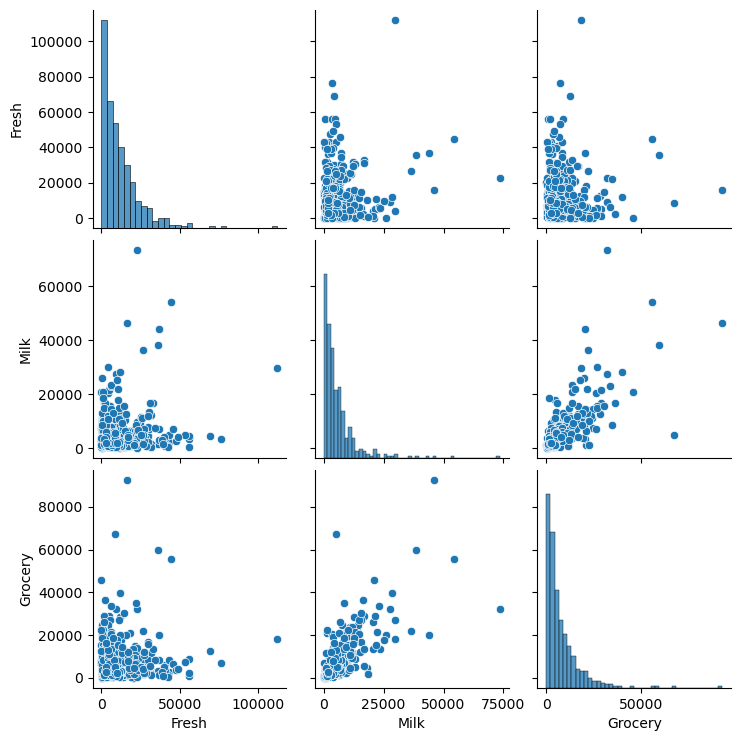

In [57]:
sns.pairplot(df_fmg)
plt.show()

In [58]:
df_fmg_std = StandardScaler().fit_transform(df_fmg)

In [59]:
from sklearn.cluster import KMeans

c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

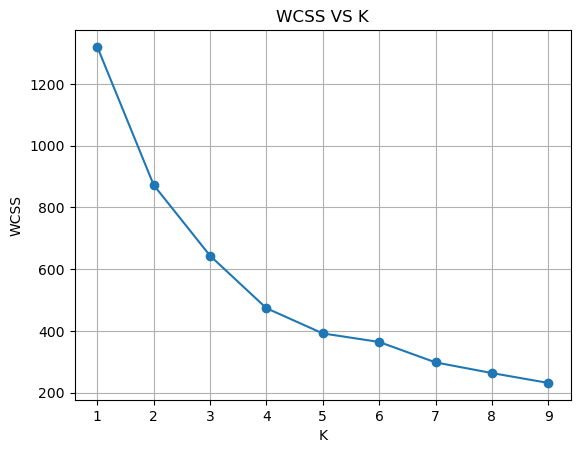

In [60]:
kmeans = [KMeans(n_clusters=k).fit(df_fmg_std) for k in range(1,10)]
wcss = [model.inertia_ for model in kmeans]
plt.plot(range(1,10),wcss,marker='o')
plt.grid()
plt.title("WCSS VS K")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


In [61]:
model = KMeans(n_clusters=4).fit(df_fmg_std)

c:\Users\gaura\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [62]:
df_fmg['label'] = model.labels_

C:\Users\gaura\AppData\Local\Temp\ipykernel_21808\538043267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fmg['label'] = model.labels_


In [63]:
df_fmg

,Fresh,Milk,Grocery,label
0,12669,9656,7561,0
1,7057,9810,9568,0
2,6353,8808,7684,0
3,13265,1196,4221,0
4,22615,5410,7198,1
...,...,...,...,...
435,29703,12051,16027,1
436,39228,1431,764,1
437,14531,15488,30243,2
438,10290,1981,2232,0


In [64]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

agc = AgglomerativeClustering(n_clusters=4,linkage='ward',metric='euclidean')

pred = agc.fit(df_fmg_std)
df_fmg['agg_label'] = pred.labels_

C:\Users\gaura\AppData\Local\Temp\ipykernel_21808\2006785082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fmg['agg_label'] = pred.labels_


In [65]:
df_fmg

,Fresh,Milk,Grocery,label,agg_label
0,12669,9656,7561,0,0
1,7057,9810,9568,0,0
2,6353,8808,7684,0,0
3,13265,1196,4221,0,3
4,22615,5410,7198,1,1
...,...,...,...,...,...
435,29703,12051,16027,1,1
436,39228,1431,764,1,1
437,14531,15488,30243,2,0
438,10290,1981,2232,0,3


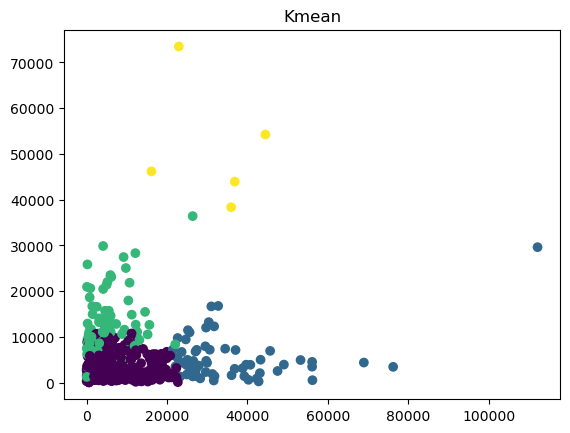

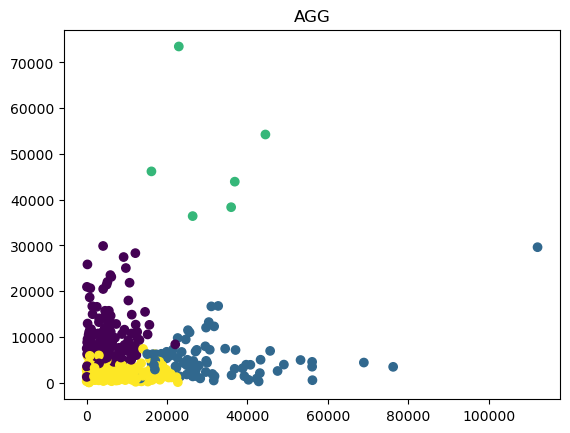

In [66]:
plt.title('Kmean')
plt.scatter(df_fmg['Fresh'],df['Milk'],c=df_fmg['label'])

plt.show()
plt.title('AGG')
plt.scatter(df_fmg['Fresh'],df['Milk'],c=df_fmg['agg_label'])

plt.show()

In [67]:
dbs = DBSCAN(min_samples=12,eps=0.5).fit(df_fmg_std)

In [68]:
df_fmg['dbs_label'] = dbs.labels_

In [69]:
df_fmg['dbs_label'].unique()

array([ 0, -1], dtype=int64)

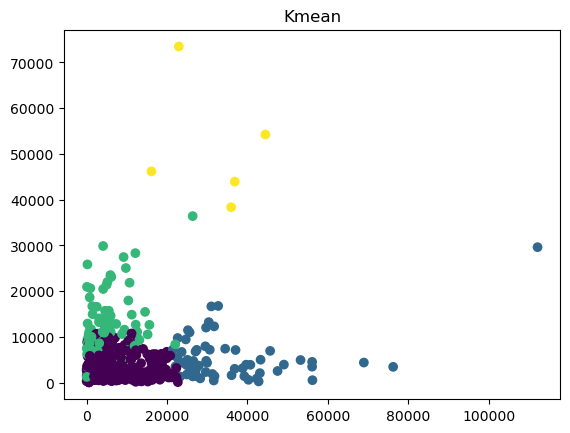

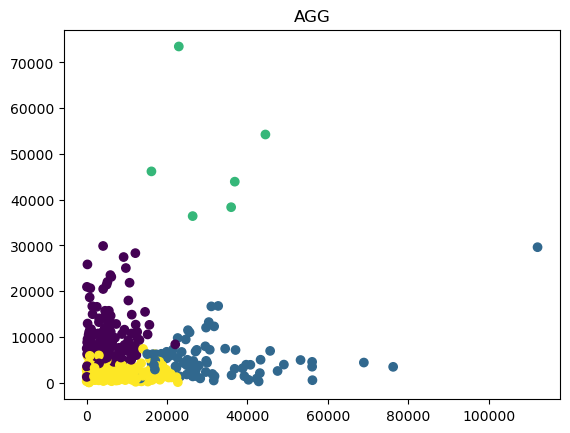

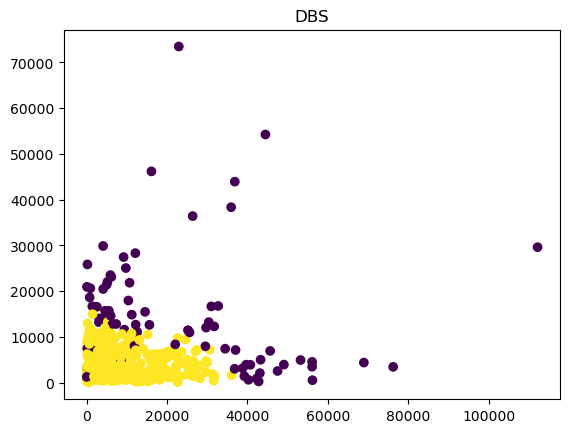

In [70]:
plt.title('Kmean')
plt.scatter(df_fmg['Fresh'],df['Milk'],c=df_fmg['label'])
plt.show()

plt.title('AGG')
plt.scatter(df_fmg['Fresh'],df['Milk'],c=df_fmg['agg_label'])
plt.show()

plt.title('DBS')
plt.scatter(df_fmg['Fresh'],df['Milk'],c=df_fmg['dbs_label'])
plt.show()

In [71]:
df_nov = pd.read_csv('AnomalyDetection.csv')

In [72]:
df_nov

,Mileage,Price
0,54.282388,67.967708
1,17.331911,70.023637
2,36.548113,68.080455
3,42.567541,71.058755
4,5.608853,57.822432
...,...,...
903,5.584939,117.000000
904,70.000000,20.000000
905,68.000000,22.000000
906,70.000000,60.000000


In [73]:
df_nov.describe()

,Mileage,Price
count,908.000000,908.000000
mean,45.869736,77.555036
std,30.598219,19.275677
min,1.398964,20.000000
25%,25.415487,64.435773
50%,34.599453,73.550501
75%,49.862529,88.939217
max,128.604249,141.201890


Text(0, 0.5, 'Price')

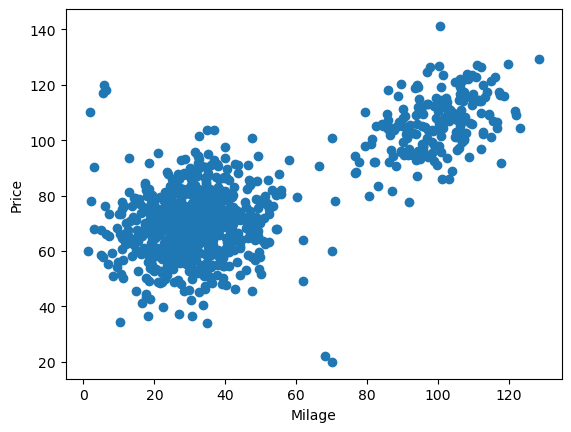

In [74]:
plt.scatter(df_nov['Mileage'],df_nov['Price'])
plt.xlabel('Milage')
plt.ylabel('Price')

In [75]:
from sklearn.covariance import EllipticEnvelope

In [76]:
model = EllipticEnvelope(assume_centered=False,support_fraction=0.1).fit(df_nov)

In [77]:
pred = model.predict(df_nov)

In [79]:
df_nov['outlier'] = pred

In [81]:
df_nov.loc[df_nov['outlier']==-1]

,Mileage,Price,outlier
704,106.158299,116.796524,-1
706,105.878689,101.894186,-1
707,100.923533,119.343126,-1
712,109.069598,115.420538,-1
713,112.123218,126.304762,-1
...,...,...,...
891,105.272123,107.325372,-1
895,128.604249,129.275592,-1
899,103.317397,110.808739,-1
904,70.000000,20.000000,-1


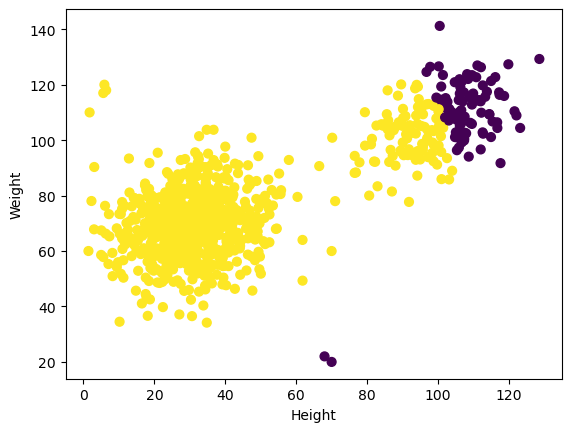

In [82]:
plt.scatter(df_nov.Mileage, df_nov.Price, s=40, c=df_nov['outlier'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()